In [1]:
from aeon.benchmarking import get_available_estimators

cls = get_available_estimators(task="classification")
print(len(cls), " classifier results available\n", cls)

C:\Users\Divya Tiwari\anaconda3\envs\aeon-dev\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


40  classifier results available
      classification
0           1NN-DTW
1           Arsenal
2              BOSS
3               CIF
4               CNN
5           Catch22
6             DrCIF
7                EE
8       FreshPRINCE
9             GRAIL
10  H-InceptionTime
11              HC1
12              HC2
13            Hydra
14    InceptionTime
15         LiteTime
16               MR
17         MR-Hydra
18       MiniROCKET
19            MrSQM
20               PF
21            QUANT
22           R-STSF
23             RDST
24             RISE
25             RIST
26           ROCKET
27              RSF
28           ResNet
29              STC
30             STSF
31         ShapeDTW
32       Signatures
33              TDE
34         TS-CHIEF
35              TSF
36          TSFresh
37       WEASEL-1.0
38       WEASEL-2.0
39            cBOSS


In [6]:
from aeon.benchmarking.results_loaders import (
    get_estimator_results,
    get_estimator_results_as_array,
)
from aeon.visualisation import (
    plot_boxplot_median,
    plot_critical_difference,
    plot_pairwise_scatter,
)
classifiers = [
    "PF",
    "FreshPRINCEClassifier",
    "HIVECOTEV2",
    "InceptionTimeClassifier",
    "WEASEL-Dilation",
]
datasets = ["ACSF1", "ArrowHead", "GunPoint", "ItalyPowerDemand"]

default_split_all, data_names = get_estimator_results_as_array(estimators=classifiers)
print(
    " Returns an array with each column an estimator, shape (data_names, classifiers)"
)
print(
    f"By default recovers the default test split results for {len(data_names)} "
    f"equal length UCR datasets."
)
default_split_some, names = get_estimator_results_as_array(
    estimators=classifiers, datasets=datasets
)

 Returns an array with each column an estimator, shape (data_names, classifiers)
By default recovers the default test split results for 112 equal length UCR datasets.


In [7]:
default_split_some

array([[0.69      , 0.89      , 0.91      , 0.91      , 0.93      ],
       [0.87428571, 0.62857143, 0.86857143, 0.86285714, 0.86285714],
       [1.        , 0.94      , 1.        , 1.        , 1.        ],
       [0.96598639, 0.89795918, 0.96987366, 0.96598639, 0.95335277]])

In [8]:
names

['ACSF1', 'ArrowHead', 'GunPoint', 'ItalyPowerDemand']

In [15]:
resamples_all, data_names = get_estimator_results_as_array(
    estimators=classifiers, default_only=False
)
print("Results are averaged over 30 stratified resamples.")

Results are averaged over 30 stratified resamples.


In [18]:
resamples_all.shape

(112, 5)

In [14]:
data_names

['ACSF1', 'ArrowHead', 'GunPoint', 'ItalyPowerDemand']

In [19]:
print(
    f" PF default train test partition of {data_names[3]} = "
    f"{default_split_all[3][0]} and averaged over 30 resamples = "
    f"{resamples_all[3][0]}"
)

 PF default train test partition of SemgHandGenderCh2 = 0.97 and averaged over 30 resamples = 0.9631111111111113


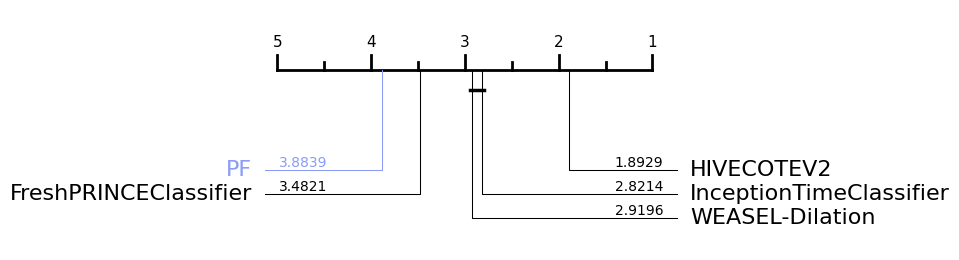

In [20]:
plot = plot_critical_difference(
    resamples_all,
    classifiers,
    test="wilcoxon",
    correction="holm",
    highlight={"PF": "#8a9bf8"},
)

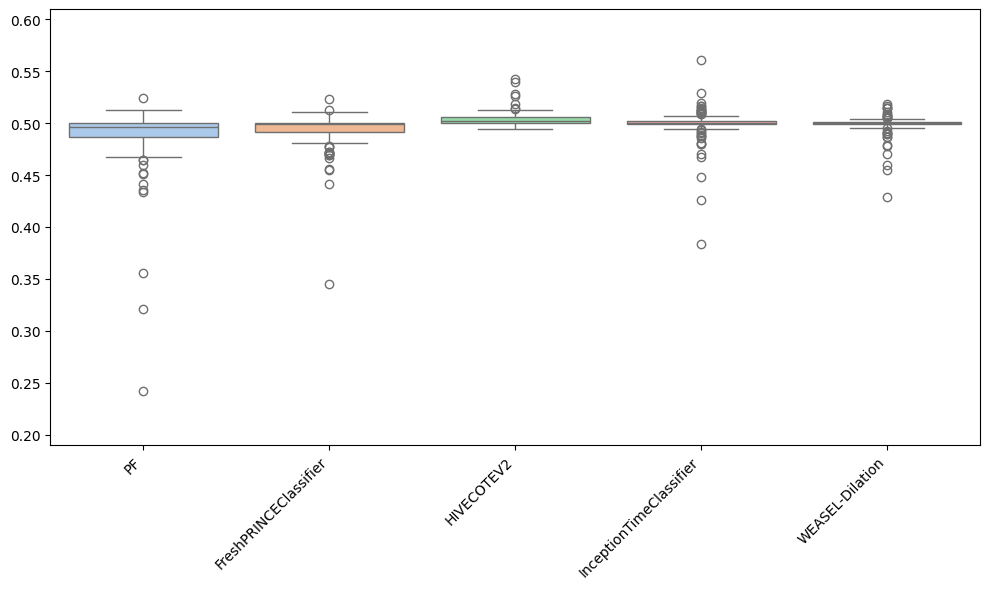

In [21]:
plot = plot_boxplot_median(
    resamples_all,
    classifiers,
    plot_type="boxplot",
    outliers=True,
)

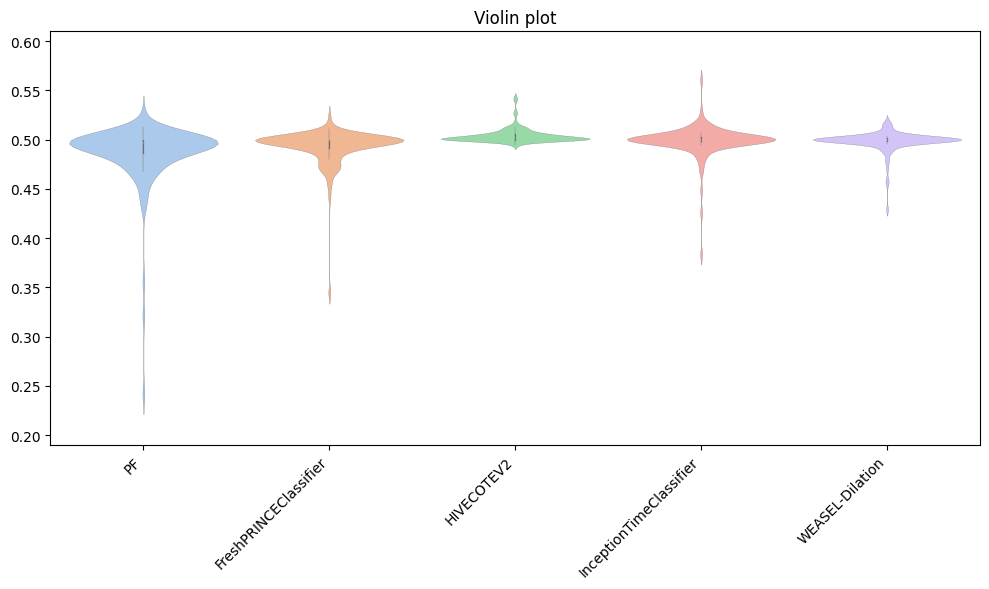

In [22]:
plot = plot_boxplot_median(
    resamples_all,
    classifiers,
    plot_type="violin",
    title="Violin plot",
)

In [27]:
default_split_all, data_names = get_estimator_results_as_array(estimators=classifiers, measure='AUROC')

In [28]:
default_split_all

array([[0.6603022 , 0.78365385, 0.68131868, 0.61978022, 0.5       ],
       [0.95880098, 0.96476394, 0.98042328, 0.96520147, 0.97619048],
       [0.94418239, 0.89504717, 0.98073899, 0.99174528, 0.93199686],
       [0.99479243, 0.99178266, 0.99545788, 0.95101343, 0.94487179],
       [0.93327834, 0.96472545, 0.96076097, 0.9426997 , 0.83623931],
       [0.98597859, 0.99017957, 0.99064367, 0.9846945 , 0.95533512],
       [0.99107368, 0.99354866, 0.99286508, 0.99594121, 0.98594378],
       [0.88233864, 0.88447205, 0.88025925, 0.842101  , 0.76583851],
       [0.98339966, 0.99295636, 0.99364457, 0.99244587, 0.91075437],
       [0.99839197, 0.99829165, 0.99906317, 0.99919151, 0.98883736],
       [0.97688527, 0.96473119, 0.98446121, 0.98749913, 0.89149634],
       [0.96457926, 0.98053536, 0.98395303, 0.99179946, 0.9446347 ],
       [0.70043733, 0.77776   , 0.754464  , 0.66913067, 0.662     ],
       [0.99901185, 0.99389909, 0.99860795, 0.98496548, 0.88678634],
       [0.99259746, 0.99275282, 0.

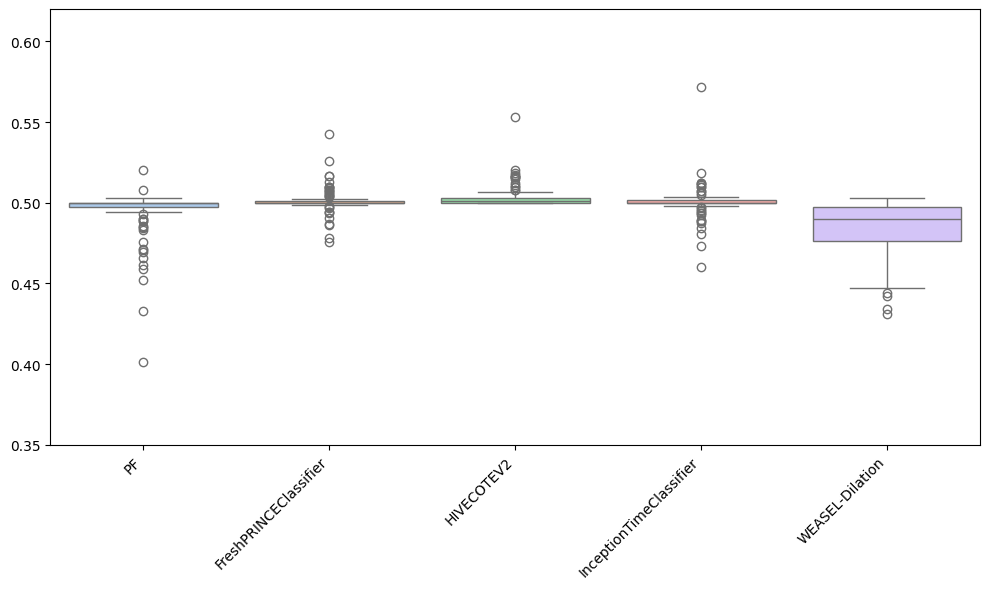

In [29]:
plot = plot_boxplot_median(
    default_split_all,
    classifiers,
    plot_type="boxplot",
    outliers=True,
)